In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 22kB/s 


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd 
import numpy as np 
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [6]:
tf.__version__

'2.4.1'

In [7]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [8]:
x.numpy()

1

In [9]:
tf.rank(x).numpy()

0

In [10]:
m = tf.constant([[1,2,3],[3,4,5]])
m

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [3, 4, 5]], dtype=int32)>

In [12]:
st = tf.constant(["Hello", 'World'])
st

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Hello', b'World'], dtype=object)>

In [13]:
tf.rank(st).numpy()

1

In [15]:
ones = tf.ones([3,3])
ones

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [16]:
zeros = tf.zeros([2,3])
zeros

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [17]:
print(tf.reshape(zeros, [3,2]))

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [18]:
tf.transpose(zeros)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [25]:
a = tf.constant(1)
b = tf.constant(2)

tf.add(a, b).numpy()

3

In [26]:
(a + b).numpy()

3

In [28]:
c = a + b
tf.square(c).numpy()

9

In [29]:
c ** c

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [31]:
d1 = tf.constant([[1,2],[4,5]])
d2 = tf.constant([[2,3],[4,2]])
tf.tensordot(d1, d2, axes=1).numpy()

array([[10,  7],
       [28, 22]], dtype=int32)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


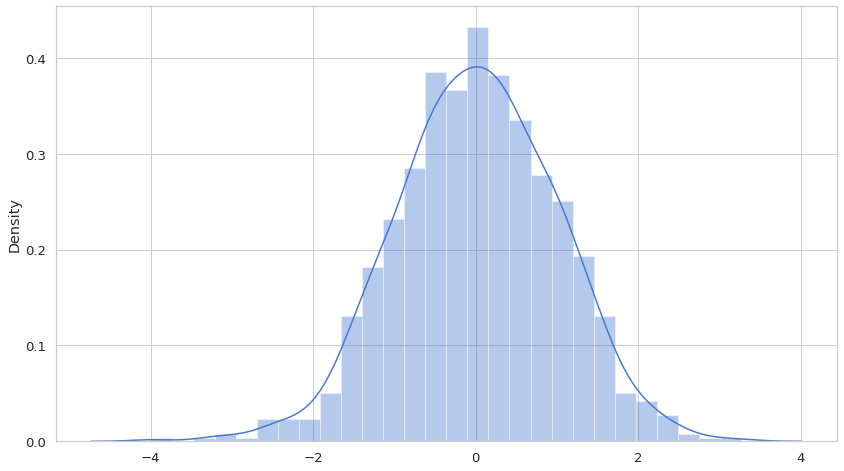

In [34]:
norm = tf.random.normal(shape=(1000,1), mean=0., stddev=1.)
sns.distplot(norm)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


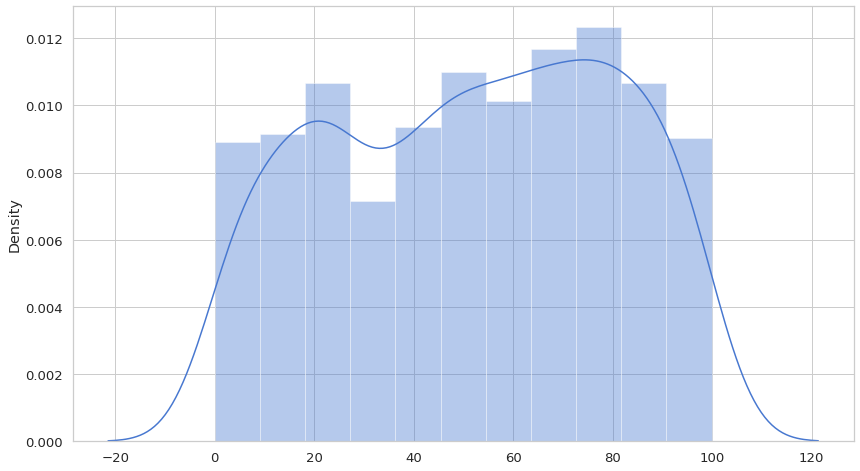

In [35]:
unif = tf.random.uniform(shape = (1000,1), minval=0, maxval=100)
sns.distplot(unif)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


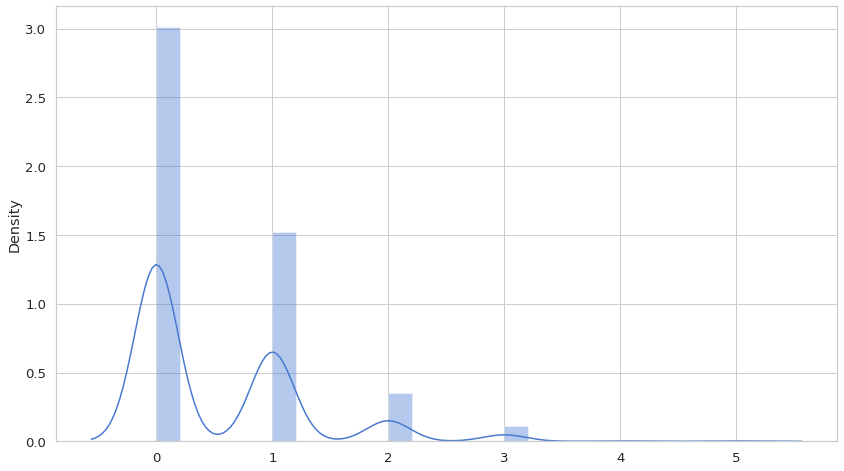

In [36]:
pois =tf.random.poisson(shape=(1000, 1), lam=.5)
sns.distplot(pois)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


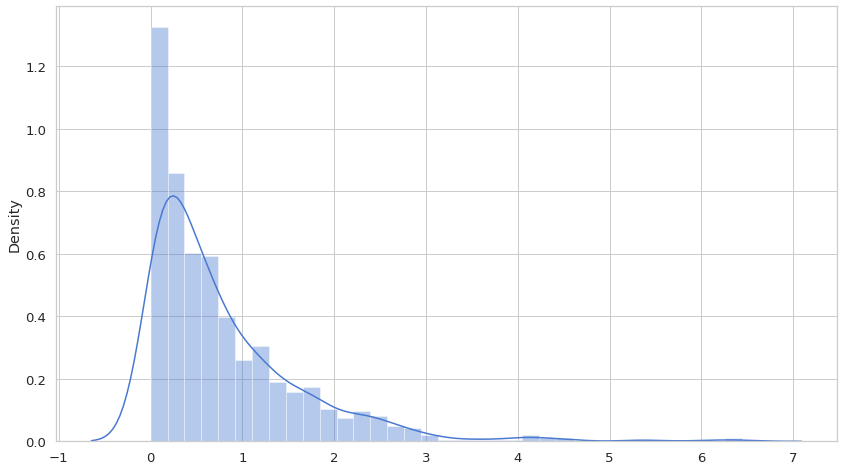

In [37]:
gam = tf.random.gamma(shape=(1000,1), alpha=0.8)
sns.distplot(gam)

In [58]:
data = tf.constant([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])
speed = data[:,0]
stopping_distance = data[:,1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'stopping distance')

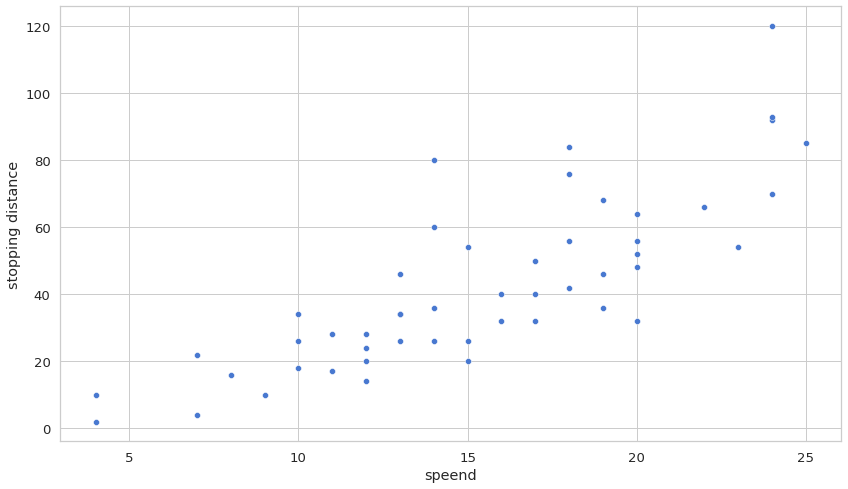

In [59]:
sns.scatterplot(speed, stopping_distance)
plt.xlabel('speend')
plt.ylabel('stopping distance')

In [60]:
lin_reg = keras.Sequential([
                            layers.Dense(1, activation='linear', input_shape = [1]),
                          ])

In [61]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(loss='mse',
                optimizer = optimizer,
                metrics = ['mse'])

In [67]:
history = lin_reg.fit(
    x = speed,
    y = stopping_distance,
    shuffle= True,
    epochs=1000,
    validation_split = 0.1,
    verbose = 0
)

In [68]:
def plot_error(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

  plt.legend()
  plt.show()

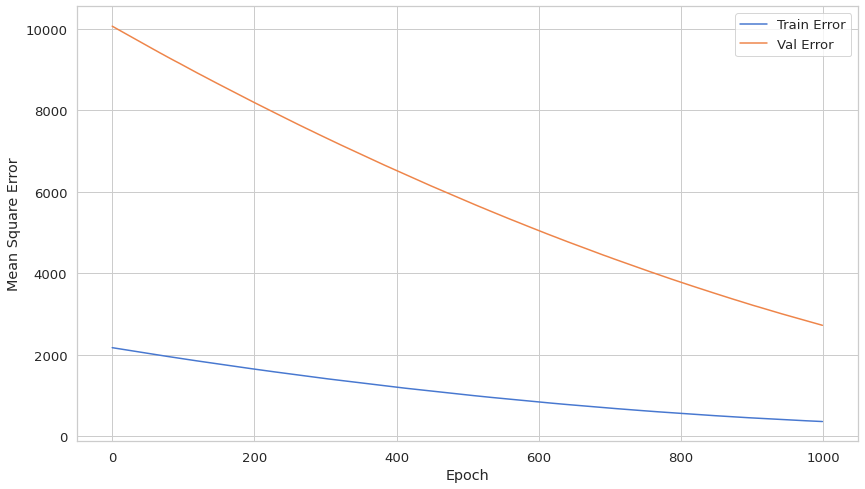

In [69]:
plot_error(history)

In [70]:
lin_reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [74]:
weights = lin_reg.get_layer('dense_3').get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]
slope

2.086713

In [75]:
##simple neural network

In [76]:
def build_neural_network():
  net = keras.Sequential([
                          layers.Dense(32, activation='relu', input_shape = [1]),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  net.compile(loss = 'mse',
              optimizer = optimizer,
              metrics = ['mse', 'accuracy'])
  return net

In [77]:
net = build_neural_network()

In [78]:
history = net.fit(
    x = speed,
    y = stopping_distance,
    shuffle = True,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0
)

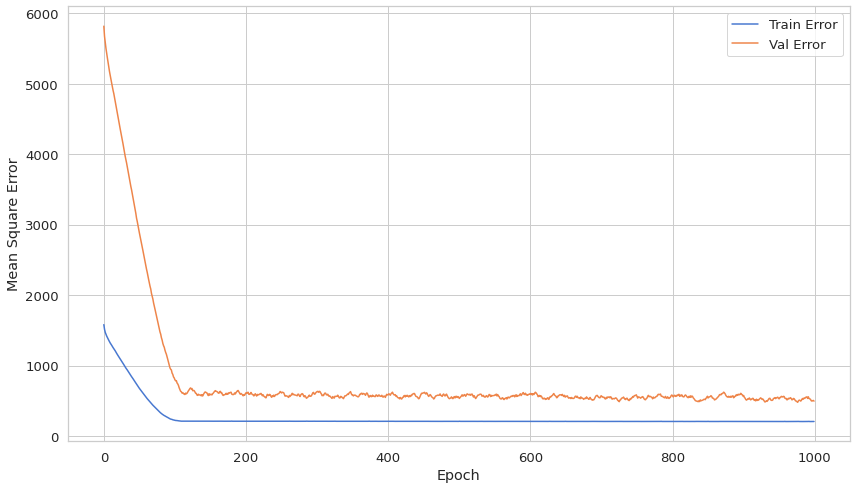

In [79]:
plot_error(history)

In [81]:
early_stop  = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10
)

In [82]:
net = build_neural_network()
history = net.fit(
    x = speed,
    y = stopping_distance,
    shuffle = True,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0,
    callbacks = [early_stop]
)

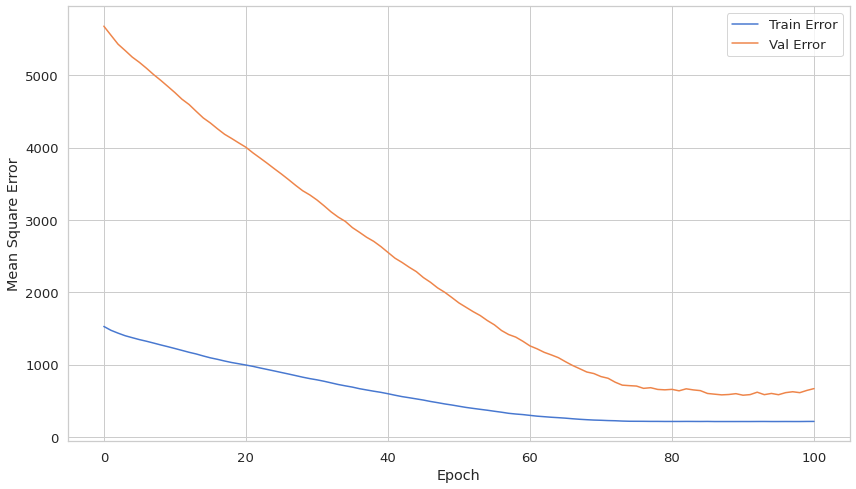

In [84]:
plot_error(history)

In [85]:
net.save('simple_net.h5')

In [86]:
simple_net = keras.models.load_model('simple_net.h5')

In [87]:
simple_net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
